## Exploratory Data Analyzing using Air Quality Index by State in USA 1980 - 2022 

### 1. Aims, objectives and background

#### 1.1. Introduction

###### The Air Quality Index (AQI) is a standardized indicator used worldwide to communicate how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. The AQI is calculated for five major air pollutants regulated by the Clean Air Act: ground-level ozone, particulate matter (PM2.5/PM10), carbon monoxide, sulfur dioxide, and nitrogen dioxide. [1]
###### There are some reasons why we have to consider the AQI:
###### * Public Health: The AQI provides essential information on the quality of the air we breathe and its potential health impacts. Exposure to poor air quality can lead to respiratory diseases, cardiovascular diseases, and other health problems.
###### * Environmental Awareness: Tracking the AQI helps raise awareness about the state of our environment, encouraging actions to reduce pollution and protect air quality.
###### * Guidance for Outdoor Activities: It offers guidance on whether it's safe to engage in outdoor activities, particularly for vulnerable groups like children, the elderly, and individuals with pre-existing health conditions.
###### * Policy Making and Regulation: AQI data aids policymakers in creating effective environmental regulations and policies to reduce air pollution and protect public health.
###### * Economic Impacts: By mitigating health risks associated with air pollution, the AQI helps reduce healthcare costs and supports a healthier, more productive society.

###### This personal project will explore the information about AQI from 1980 to 2022

#### 1.2. Aimes and Objective
###### Within this project, I would like to explore the following:
###### * Trending of AQI during period 1980-2022
###### * Which states have the AQI heighest? Find 5 states 
###### * Which main pollutants drive the changing of AQI for 5 states?

#### 1.3. Dataset
###### - Dataset source: https://www.kaggle.com/datasets/adampq/air-quality-index-by-state-1980-2022

2. Preprocess Data

In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Read data

aqi_data = pd.read_csv('C:/Users/linhn/OneDrive/Desktop/Project_AQI/AQI_data/AQI By State 1980-2022.csv')

# Overall check for missing values in the dataset

overall_missing = aqi_data.isnull().sum().sum()

#Column-wise check for missing values

column_wise_missing = aqi_data.isnull().sum()

In [4]:
# Splitting Geo_loc in two separate columns for latitude and longtitude

aqi_data[['Latitude','Longitude']] = aqi_data['Geo_Loc'].str.strip('POINT ()').str.split(' ', expand=True)

# Converting the new columns to numeric values

aqi_data['Latitude'] = pd.to_numeric(aqi_data['Latitude'])

aqi_data['Longitude'] = pd.to_numeric(aqi_data['Longitude'])


#### The data is recorded as the total across all reporting counties for the given state and year, so I divide the columns by the total number of counties reported to get the average for each county

In [5]:
# Columns to average per county

columns_to_average = ['Dys_w_AQI', 'Dys_NM', 'Dys_Blw_Thr', 'Dys_Abv_Thr', 'Good Days', 'Median AQI','Moderate Days', 
                      'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 
                      'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'Max AQI']  

# Calculate the average per county

for col in columns_to_average:
    aqi_data[f'Avg {col} per County'] = aqi_data[col] / aqi_data['Cnty_Rpt']

#### 2. Trending of average AQI per County from 1980-2022

In [6]:
import ipywidgets as widgets
from IPython.display import display
#Create interactive map to visualize the average median AQI per county for all states with a year slider
from ipywidgets import fixed, interactive
import plotly.express as px
# import plotly.graph_objects as go
year_slider = widgets.IntSlider(
    value=aqi_data['Year'].min(), 
    min=aqi_data['Year'].min(), 
    max=aqi_data['Year'].max(), 
    step=1, 
    description='Year',
    continuous_update=False
)
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }
aqi_data['State_short'] = aqi_data['State'].map(state_abbreviations)
max_aqi = aqi_data['Avg Median AQI per County'].max()
min_aqi = aqi_data['Avg Median AQI per County'].min()
def plot_map_for_year(year, aqi_data):
    filtered_data = aqi_data[aqi_data['Year'] == year].copy()
    #filtered_data['Normalized Avg Median AQI per County'] = (filtered_data['Avg Median AQI per County'] - min_aqi) / (max_aqi - min_aqi)
    #filtered_data['Normalized Median AQI'] = (filtered_data['Median AQI'] - min_aqi) / (max_aqi - min_aqi)
#Using normalized AQI to higlight the difference in AQI median values of all states 
    map = px.choropleth(filtered_data,
                        locationmode='USA-states',    # Ensures that the map is USA states
                        locations='State_short',           # Column in your DataFrame with state identifiers
                        color='Avg Median AQI per County',      # Use Normalized AQI for coloring
                        hover_name='State_short',          # Column to show in hover information
                        scope="usa",                 # Scope to focus on the USA
                        title=f'Avg Median AQI per County Map for {year}',
                        color_continuous_scale='Jet',# Set the color scale to Jet
                        range_color=[min_aqi,max_aqi]) 
    map.show()
widgets.interactive(plot_map_for_year, year=year_slider, aqi_data=fixed(aqi_data)) # Fix to ensure input data does not change in the interactive plot


interactive(children=(IntSlider(value=1980, continuous_update=False, description='Year', max=2022, min=1980), …

In [7]:
#Create a combo box of states connected to a line chart to visualize the time series of median AQI 
# Dropdown widget for states
state_dropdown = widgets.Dropdown(
    options = sorted(aqi_data['State'].unique()),
    description = 'State:',
    value = 'California'  # Default value, change as needed
)

# Function to update the plot based on the selected state
def update_plot(state):
    filtered_data = aqi_data[aqi_data['State'] == state]
    fig = px.line(filtered_data, x='Year', y='Avg Median AQI per County', title=f'Avg Median AQI per County in {state} Over Time')
    fig.show()

# Display the dropdown and update the plot when the selection changes
widgets.interactive(update_plot, state=state_dropdown)

interactive(children=(Dropdown(description='State:', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

In [8]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Assuming 'aqi_data' is your DataFrame and it has columns like 'State', 'Year', 'Avg Max AQI per County', 'Avg Median AQI per County', etc.

# Dropdown widget for states
state_dropdown = widgets.Dropdown(
    options=sorted(aqi_data['State'].unique()),
    description='State:',
    value='California'  # Default value, change as needed
)

# AQI categories and their corresponding colors
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Function to update the plot based on the selected state
def update_plot(state):
    filtered_data = aqi_data[aqi_data['State'] == state]
    
    # Initialize the figure
    fig = go.Figure()
    
     # Add line for the Avg Max AQI per County, set the color to red
    fig.add_trace(go.Scatter(x=filtered_data['Year'], y=filtered_data['Avg Max AQI per County'],
                             mode='lines',
                             name='Avg Max AQI',
                             line=dict(color='red')))  # Setting line color to red
    
    # Add line for the Avg Median AQI per County, set the color to blue
    fig.add_trace(go.Scatter(x=filtered_data['Year'], y=filtered_data['Avg Median AQI per County'],
                             mode='lines',
                             name='Avg Median AQI',
                             line=dict(color='blue')))  # Setting line color to blue

    # Add colored background for AQI categories
    for category, info in aqi_categories.items():
        fig.add_shape(type="rect",
                      xref="paper", yref="y",
                      x0=0, y0=info['range'][0], x1=1, y1=info['range'][1],
                      fillcolor=info['color'], opacity=0.3,
                      layer="below", line_width=0,)
        # Optionally, add labels for each AQI category on the plot
        fig.add_annotation(x=1, y=(info['range'][0]+info['range'][1])/2, 
                           text=category, showarrow=False, 
                           xref="paper", yref="y",
                           font=dict(size=10, color="black"), 
                           align="center")
    
    # Update layout
    fig.update_layout(title=f'Average Max and Median AQI per County in {state} Over Time',
                      xaxis_title='Year',
                      yaxis_title='AQI',
                      legend_title='Legend',
                      yaxis=dict(range=[0, 700]))  # Adjust y-axis to cover the AQI range
    
    fig.show()

# Display the dropdown and update the plot when the selection changes
interactive_plot = widgets.interactive(update_plot, state=state_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='State:', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

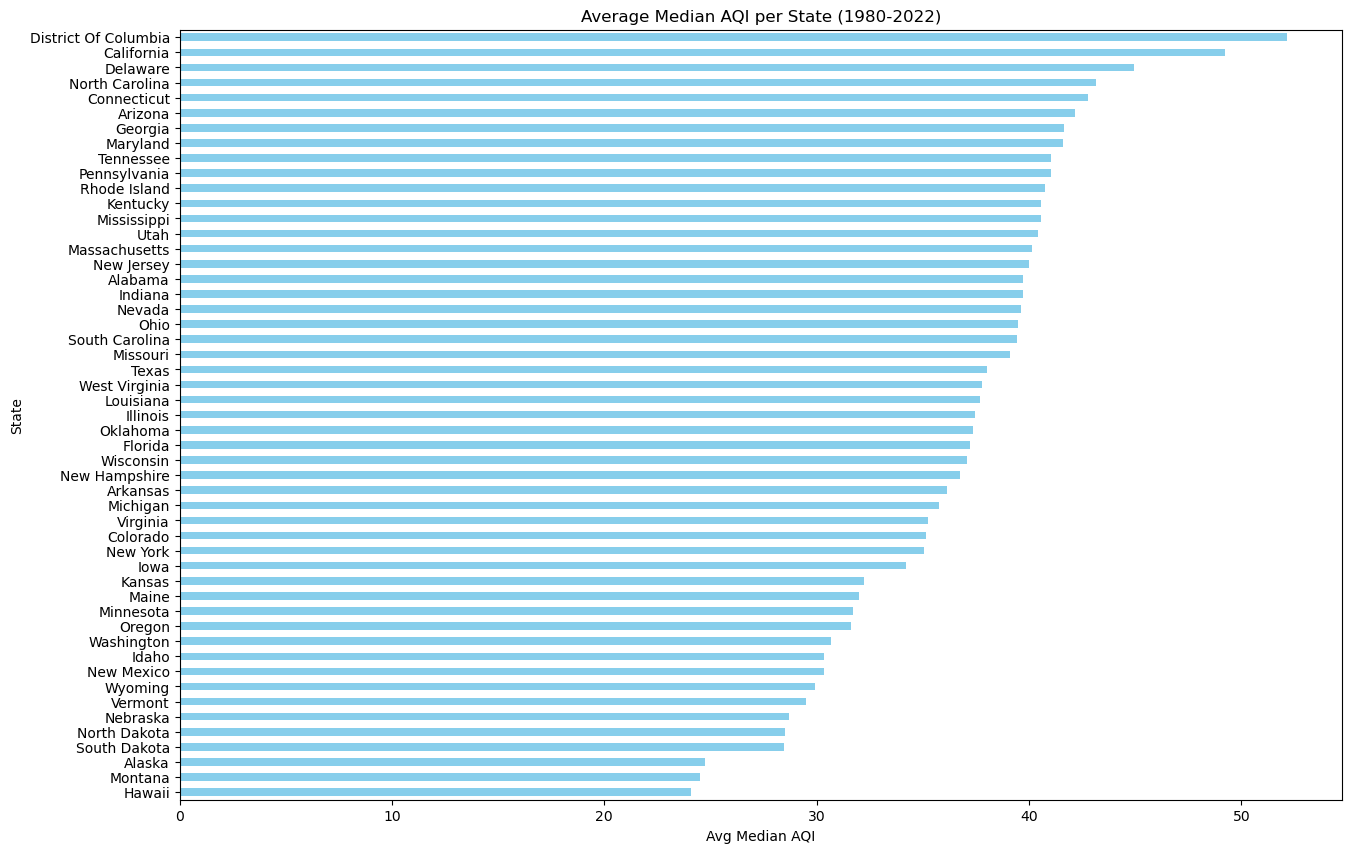

In [9]:
import matplotlib.pyplot as plt
# Average Median AQI for each state
# Calculate the average Median AQI for each state over the entire period
avg_median_aqi_per_state = aqi_data.groupby('State')['Avg Median AQI per County'].mean()
avg_median_aqi_per_state  = aqi_data.groupby('State')['Avg Median AQI per County'].mean().sort_values()
# Visualization
plt.figure(figsize=(15, 10))
avg_median_aqi_per_state .plot(kind='barh', color='skyblue')
plt.title('Average Median AQI per State (1980-2022)')
plt.xlabel('Avg Median AQI')
plt.ylabel('State')
plt.show()

In [10]:
# Identify the top five states with the highest average Median AQI
top_five_states_highest_aqi = avg_median_aqi_per_state.sort_values(ascending=False).head(5)

top_five_states_highest_aqi

State
District Of Columbia    52.139535
California              49.227496
Delaware                44.934109
North Carolina          43.136009
Connecticut             42.800388
Name: Avg Median AQI per County, dtype: float64

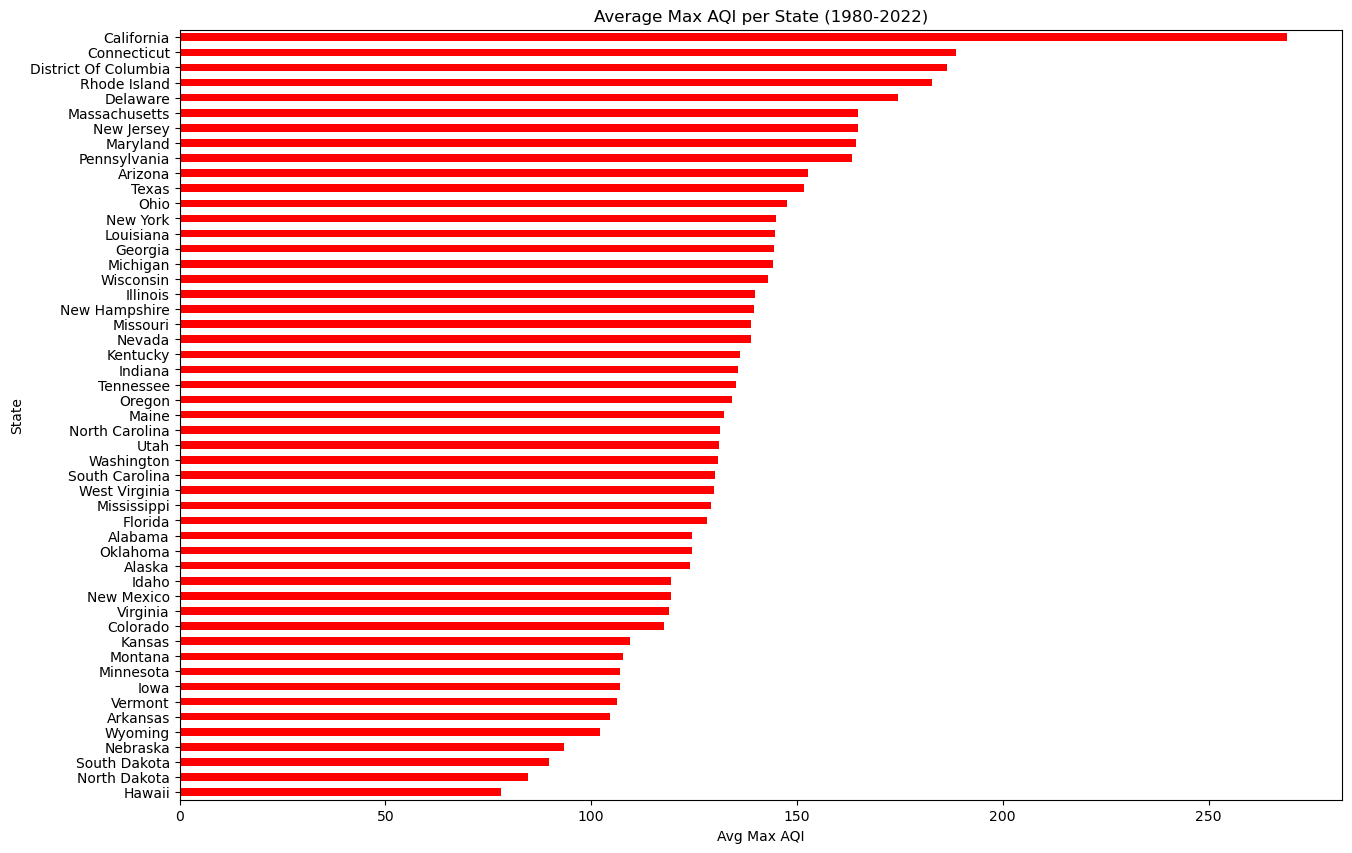

In [11]:
import matplotlib.pyplot as plt
# Average Max AQI for each state
# Calculate the average Max AQI for each state over the entire period
avg_max_aqi_per_state = aqi_data.groupby('State')['Avg Max AQI per County'].mean()
avg_max_aqi_per_state  = aqi_data.groupby('State')['Avg Max AQI per County'].mean().sort_values()
# Visualization
plt.figure(figsize=(15, 10))
avg_max_aqi_per_state .plot(kind='barh', color='red')
plt.title('Average Max AQI per State (1980-2022)')
plt.xlabel('Avg Max AQI')
plt.ylabel('State')
plt.show()

In [12]:
# Identify the top five states with the highest average Median AQI
top_five_states_highest_max_aqi = avg_max_aqi_per_state.sort_values(ascending=False).head(5)

top_five_states_highest_max_aqi

State
California              269.022962
Connecticut             188.576550
District Of Columbia    186.418605
Rhode Island            182.918605
Delaware                174.596899
Name: Avg Max AQI per County, dtype: float64

##### * California (269.02): California has the highest average maximum AQI per county among the states listed. This is possibly due to a combination of factors such as wildfires, population density, traffic congestion, and industrial emissions. California's diverse geography and climate also contribute to varying air quality issues across the state, from the Central Valley's agricultural emissions to the urban pollution in Los Angeles and the Bay Area.

##### * Connecticut (188.58): Connecticut, while significantly lower than California, still has a relatively high average maximum AQI. Factors could include vehicle emissions, industrial activities, and its proximity to other urban areas in the Northeastern United States, which can contribute to smog and air pollution.

##### * District Of Columbia (186.42): The District Of Columbia's average maximum AQI is close to Connecticut's, likely influenced by urban pollution, traffic, and possibly the heat island effect common in densely built-up areas. Being a significant urban center, emissions from vehicles and commercial activities play a crucial role in air quality.

##### * Rhode Island (182.92): As the smallest state, Rhode Island's air quality can be significantly impacted by both local activities and transboundary pollution from surrounding areas. Its coastal location might offer some dispersion advantages for pollutants, but urban and industrial emissions remain a concern.

##### * Delaware (174.60): Delaware shows the lowest average maximum AQI among the states listed, but it's still notably high. Factors could include emissions from industrial sources, traffic, and its location downwind of several major metropolitan areas, which can affect air quality due to transported pollutants.

#### I found that there 6 states which have the highest average AQI, they are:
- District of Columbia
- California
- North Carolina
- Delaware
- Connecticut
- Rhode Island

I will extract more information about these states to have more understanding about which main pollutant that have more impact on the changing of average AQI per County

##### 3. Which main pollutants drive the changing of AQI for highest max and median AQI states?

we are considered 6 main pollutants that drive the changing of AQI. They are population, Ozone, carbon dioxine, nitrit, particulate matter PM2.5, PM10. Therefore, I calculate the correlation between median AQI and each main pollutant for 6 states which have the highest average max AQI per county. 

In [13]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# Assuming 'aqi_data' is your DataFrame containing the data

# List of states and metrics of interest
states_of_interest = ['California', 'District Of Columbia', 'Connecticut', 'Delaware', 'North Carolina', 'Rhode Island']
metrics = ['Pop_Est', 'Avg Days Ozone per County', 'Avg Days NO2 per County', 'Avg Days CO per County',
           'Avg Days PM2.5 per County', 'Avg Days PM10 per County']

# Initialize a DataFrame to store the correlation coefficients
correlation_df = pd.DataFrame(index=states_of_interest, columns=metrics)

# Calculate the correlation for each metric within each state
for state in states_of_interest:
    state_data = aqi_data[aqi_data['State'] == state]
    
    for metric in metrics:
        # Ensure there are no missing values for the metric and the 'Avg Median AQI per County'
        valid_mask = ~np.isnan(state_data['Avg Median AQI per County']) & ~np.isnan(state_data[metric])
        valid_aqi = state_data['Avg Median AQI per County'][valid_mask]
        valid_metric = state_data[metric][valid_mask]
        
        # Calculate the Pearson correlation coefficient if valid data exists
        if len(valid_aqi) > 1:
            corr, _ = pearsonr(valid_aqi, valid_metric)
            correlation_df.loc[state, metric] = corr
        else:
            correlation_df.loc[state, metric] = np.nan  # Assign NaN if not enough data

# Now 'correlation_df' will have states as rows and metrics as columns with their corresponding correlations
correlation_df


,Pop_Est,Avg Days Ozone per County,Avg Days NO2 per County,Avg Days CO per County,Avg Days PM2.5 per County,Avg Days PM10 per County
California,-0.620828,-0.251204,0.469996,0.661226,-0.340202,-0.444361
District Of Columbia,-0.430938,-0.678067,0.225713,0.413377,-0.029996,0.119856
Connecticut,-0.609439,-0.305646,0.223688,0.715965,-0.31415,-0.34525
Delaware,-0.079281,0.016198,0.045906,-0.584879,0.237187,-0.12734
North Carolina,-0.389469,-0.015933,0.075898,0.368752,-0.129145,-0.456106
Rhode Island,-0.668372,-0.375804,0.429102,0.617671,-0.582291,-0.001406


                      Pop_Est_percentage  \
California                      0.000000   
District Of Columbia            6.700274   
Connecticut                     0.000000   
Delaware                       16.757944   
North Carolina                  3.041920   
Rhode Island                    0.000000   

                      Avg Days Ozone per County_percentage  \
California                                       11.552220   
District Of Columbia                              0.000000   
Connecticut                                      10.053386   
Delaware                                         19.922564   
North Carolina                                   20.093423   
Rhode Island                                      8.531824   

                      Avg Days NO2 per County_percentage  \
California                                     34.092544   
District Of Columbia                           24.503656   
Connecticut                                    27.570538   
Delaware        

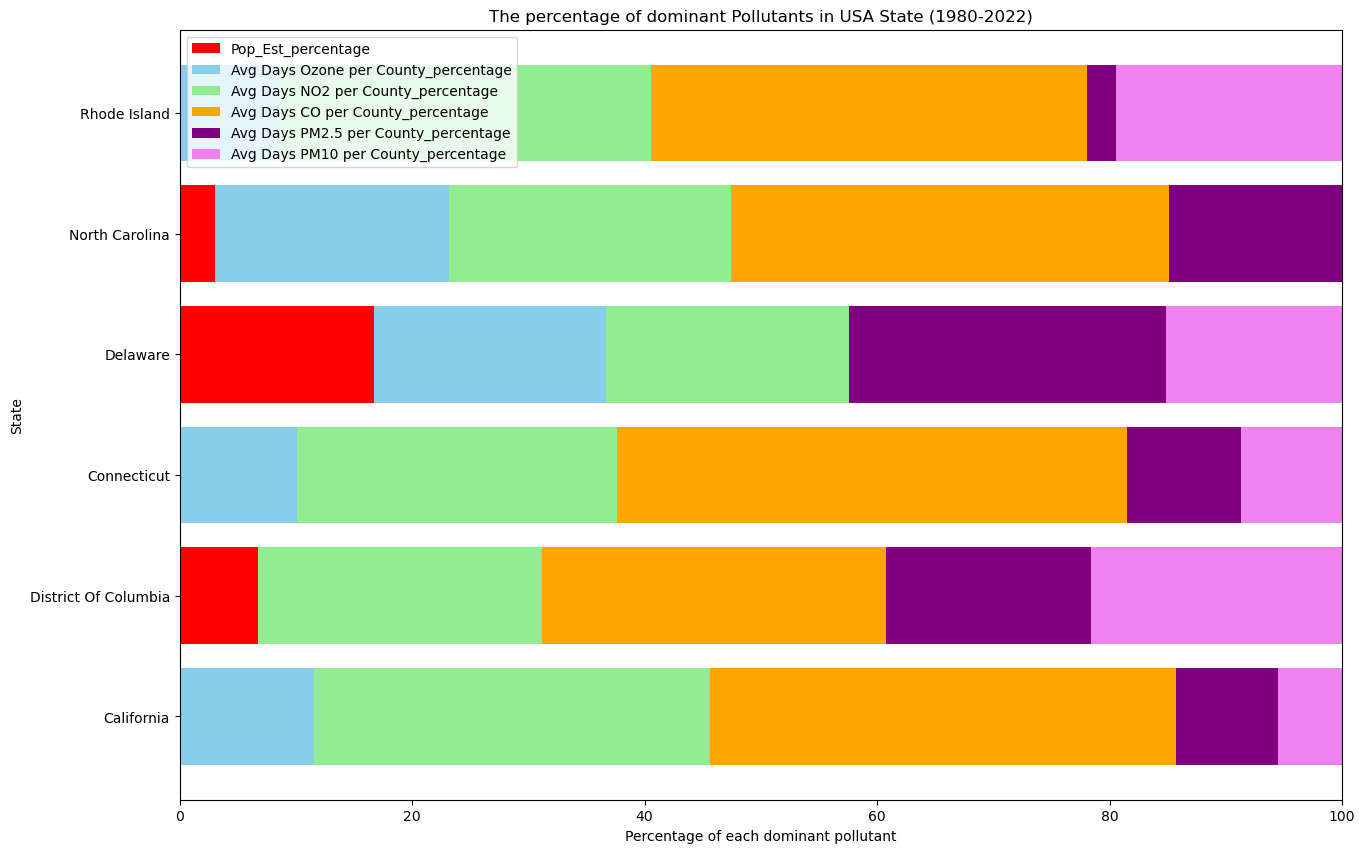

In [16]:
for state in states_of_interest:
    max_val = correlation_df.loc[state,:].max()
    min_val = correlation_df.loc[state,:].min()
    for column in metrics:
        correlation_df.loc[state,column + '_normalized'] = (correlation_df.loc[state,column] - min_val) / (max_val - min_val)


norm_corr_df=correlation_df.iloc[:,6:]
# Percentage of each metric for interested state
percentage_corr_df = pd.DataFrame(index=states_of_interest)



for state in states_of_interest:
    sum_val = norm_corr_df.loc[state,:].sum()
    for metric in metrics:
        percentage_corr_df.loc[state,metric + '_percentage'] = norm_corr_df.loc[state,metric + '_normalized']/sum_val*100


##########################################################

import matplotlib.pyplot as plt

# Visualization for each pollutant
plt.figure(figsize=(15, 10))

columns_list = percentage_corr_df.columns.tolist()

# Assign specific colors to each pollutant
colors = ['red', 'skyblue', 'lightgreen', 'orange', 'purple','violet']


# print(state_pollutant_data)
# Plotting stacked bars for each state
for state in states_of_interest:
    bottom_val = 0  # Initialize the bottom at 0 for each state
    for pollutant, color in zip(columns_list, colors):
        
        plt.barh(state, percentage_corr_df.loc[state,pollutant], left=bottom_val, color=color)
        bottom_val += percentage_corr_df.loc[state,pollutant]

plt.title('The percentage of dominant Pollutants in USA State (1980-2022)')
plt.xlabel('Percentage of each dominant pollutant')
plt.ylabel('State')

# Create the legend once, outside the loop
for pollutant, color in zip(columns_list, colors):
    plt.barh(0, 0, color=color, label=pollutant)
print(percentage_corr_df)
plt.legend()
plt.show()

##### - Population factor does not have a major impact on the AQI index
##### - CO is the main driver of change in AQI for most states except Delaware where the main influencing factor is PM2.5
##### - After CO, it must be noted that NO2 is also a factor that affects the change in AQI index

##### 4. Conclusions
- CO and NO2 are the primary pollutants affecting AQI in the USA from 1980-2022.
- Rhode Island may be the smallest state, but its average maximum Air Quality Index (AQI) levels can reach unsafe levels.
- Urban density and traffic contribute to NO2 and CO level. The process of urbanization has led to a significant impact on the quality of air, which is evident from the chart displaying the average maximum AQI values of various states. Although the median AQI values are still within safe limits, the maximum AQI values can sometimes reach dangerous levels, posing a severe health risk. This highlights the need for implementing strategies that focus on reducing traffic volume and managing policies to ensure sustainable urban development.

#### Ideas for future:
* Collecting and analyzing data on urbanization, including traffic volume and industry development speed, policymakers can obtain more comprehensive information and make necessary policy changes.


# References/ Resources used:
1.	https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information